In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# load the data
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.shape

(53940, 10)

In [4]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

## Problem Statement 
* build the system which can take features of diamnond like carat, cut, color, clarity,x,y,zetc... and predict the price .
* target variable - Price

In [11]:
df = df[['carat', 'cut', 'color', 'clarity','depth','table','price','x','y','z']]

df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


* Price - price in us dollars (326 - 18,823)
* carat - weight of the diamond (0.2 - 5.01)
* Cut - quality of the cut (fair,good,very good,premium,ideal)
* color - diamond color, from j(worst) to D(best)
* clarity - a measurement of how the diamond is (I1(worst),SI2,SI1,VS2,VS1,VVS2,VVS1,IF(best))
* x - length in mm (0-10.74)
* y - width in mm(0-58.9)
* z - depth in mm (0-31.8)
* depth - total depth percentage = z/mean(x,y) = 2*z/(x+y).....(43 - 79)
* table - width of top of diamond retireve to widest point (43 - 95)

In [12]:
df.rename(columns = {"x":"length","y":"width","z":"depth","depth":"depth_percent","table":"table_percent"},inplace = True)

In [13]:
df.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
df.describe(include = "all")

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


### Observation
* 1. there are nearly 53940 datapoints with 10 features in columns.
  2. teh dataset comprises of 3 categorical columns and 7 numerical columns
  3. from the describe cell we can say that the most common 4 diamond in
  4. dataset has ideal cut, color G (nearly colorless) and SI1(slightly included)
  5. columns x,y,z which repersent the length, breadth and depth of thte diamond have minimum values as 0 . these 0 value will be dealt when taking care of outliers.

In [16]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [17]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [18]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [19]:
# first finding the ratio of x/y so as to identify the 0
# vlalues as well how it correlates with other features present in the dataframe 
df['L/W'] = df['length']/df['width']
df.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth,L/W
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701


In [20]:
print(df['cut'].unique().tolist())
print(df['clarity'].unique().tolist())
print(df['color'].unique().tolist())

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
['E', 'I', 'J', 'H', 'F', 'G', 'D']


#### observations :
* some of the categorical values are not present in the data such as color values from k to z,clarity values such as I2 and I3, and also poor cut are not there.

In [21]:
df.describe(include="all")

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth,L/W
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.999409
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.012434
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,1.006944


In [22]:
# we find that length , width, depth and L/W have 0 values as minimum which cannot exist for a diamond,.
#so now lets find how many such values are there.


In [25]:
print(df.loc[(df['length'] ==0) | (df['width'] == 0) | (df['depth']== 0) | (df['L/W']==0)] )

       carat        cut color clarity  depth_percent  table_percent  price  \
2207    1.00    Premium     G     SI2           59.1           59.0   3142   
2314    1.01    Premium     H      I1           58.1           59.0   3167   
4791    1.10    Premium     G     SI2           63.0           59.0   3696   
5471    1.01    Premium     F     SI2           59.2           58.0   3837   
10167   1.50       Good     G      I1           64.0           61.0   4731   
11182   1.07      Ideal     F     SI2           61.6           56.0   4954   
11963   1.00  Very Good     H     VS2           63.3           53.0   5139   
13601   1.15      Ideal     G     VS2           59.2           56.0   5564   
15951   1.14       Fair     G     VS1           57.5           67.0   6381   
24394   2.18    Premium     H     SI2           59.4           61.0  12631   
24520   1.56      Ideal     G     VS2           62.2           54.0  12800   
26123   2.25    Premium     I     SI1           61.3           5

In [26]:
print('length :', len(df.loc[(df['length'] ==0) | (df['width'] == 0) | (df['depth']== 0) | (df['L/W']==0)] ))

length : 20


#### Observations :
* there are 20 datapoints which have 0 values in one or the other columns. since the number of datapoints with 0 values are very less, compared to the total number of datapoints , deleting them not affect our feature models.
* L/W column has NAN values which will happen when W = 0. so now to delete all these datapoints we first replace the 0 values with NAN and then drop the using pandas drop.

In [27]:
df[['length','width','depth','L/W']] = df[['length','width','depth','L/W']].replace(0,np.NaN)
df.dropna(inplace= True)

In [28]:
df.describe()

,carat,depth_percent,table_percent,price,length,width,depth,L/W
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,0.999425
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,0.011666
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.137351
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,0.992625
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.995745
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,1.006944
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.615572


In [29]:
df.shape

(53920, 11)

<Axes: >

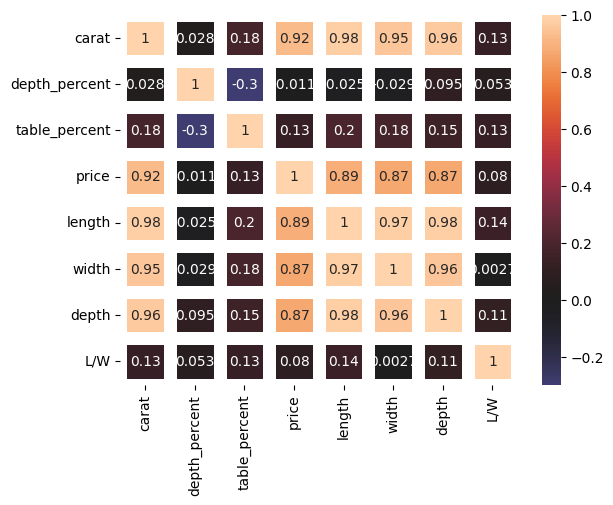

In [32]:
# findiing the correlation between the featurres of the given data
sns.heatmap(df.corr(numeric_only=True),annot = True, linewidth= 8, center= 0)

### Observation 
* We find Price has a very high correlation with carat, length, width and depth

## 4.) Data Preprocessing 

In [33]:
# Label encoding - Ordinal categorical data 
df['clarity_score'] = df['clarity'].replace(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'],[8,7,6,5,4,3,2,1])
df['color_score'] = df['color'].replace(['D','E','F','G','H','I','J'],[7,6,5,4,3,2,1])
df['cut_score'] = df['cut'].replace(['Ideal','Premium','Very Good','Good','Fair'],[5,4,3,2,1])

df.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth,L/W,clarity_score,color_score,cut_score
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,2,6,5
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,3,6,4
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086,5,6,2
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908,4,2,4
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701,2,1,2


In [35]:
#Separating Inputs and Outputs but before we need to cehck skewness of TV
df['price'].skew()

1.6183486340820077

In [36]:
#Log transforming the Output 
#Log Transformation is the data preprocessing step :
#Makes Large values to smaller
#Reduces skewness 
# Stabilizes Variance 
#Helps Linear model fit better
df['price_log'] = pd.DataFrame({'price':np.log(df['price'])})
df.head()

,carat,cut,color,clarity,depth_percent,table_percent,price,length,width,depth,L/W,clarity_score,color_score,cut_score,price_log
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,0.992462,2,6,5,5.786897
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1.013021,3,6,4,5.786897
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,0.995086,5,6,2,5.789960
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,0.992908,4,2,4,5.811141
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,0.997701,2,1,2,5.814131


In [37]:
#separate the x and y
Y = df['price_log']
X = df[['carat','depth','length','width']]

In [38]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2,random_state = 0)

In [39]:
cols = ['carat','depth','length','width']

In [41]:
#standardizing the X_train and X_test
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_transformed = pd.DataFrame(scale.fit_transform(X_train),columns = cols, index = X_train.index)
X_test_transformed = pd.DataFrame(scale.transform(X_test),columns = cols, index = X_test.index)
print(X_train_transformed.head())

          carat     depth    length     width
34119 -0.881034 -0.936431 -0.992441 -0.959951
16744  0.848923  1.049320  0.927950  0.864034
31353 -0.796646 -0.794592 -0.822732 -0.790070
41291 -0.923228 -0.993167 -1.028169 -0.995716
31081 -0.986519 -1.163374 -1.171082 -1.156656


In [42]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43136 entries, 34119 to 2734
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   43136 non-null  float64
 1   depth   43136 non-null  float64
 2   length  43136 non-null  float64
 3   width   43136 non-null  float64
dtypes: float64(4)
memory usage: 1.6 MB


In [43]:
X_test_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10784 entries, 15190 to 2191
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   10784 non-null  float64
 1   depth   10784 non-null  float64
 2   length  10784 non-null  float64
 3   width   10784 non-null  float64
dtypes: float64(4)
memory usage: 421.2 KB


## 5.) Model Building 
* 5.1) Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
Regression = LinearRegression()
Regression.fit(X_train_transformed,Y_train)

#making prediction 
y_pred_LR = Regression.predict(X_test_transformed)

In [45]:
from sklearn import metrics
mae_LR = metrics.mean_absolute_error(Y_test,y_pred_LR)
print('Mean Absolute Error: ' , mae_LR)
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,y_pred_LR))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test,y_pred_LR)))
      

Mean Absolute Error:  0.20425189912933456
Mean Squared Error:  0.07310176919865358
Root Mean Squared Error:  0.2703733884809183


* 5.2) KNN 

In [46]:
from sklearn.neighbors import KNeighborsRegressor
KNNreg = KNeighborsRegressor()
KNNreg.fit(X_train_transformed,Y_train)

#making Predictions
y_pred_KNN = KNNreg.predict(X_test_transformed)

In [47]:
#Evaluation
mae_KNN = metrics.mean_absolute_error(Y_test,y_pred_KNN)
print('Mean Absolute Error: ' , mae_KNN)
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,y_pred_KNN))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test,y_pred_KNN)))

Mean Absolute Error:  0.19825728708683454
Mean Squared Error:  0.0647652684754022
Root Mean Squared Error:  0.25449021292655283


* 5.3) Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor
DTreg = DecisionTreeRegressor()
DTreg.fit(X_train_transformed,Y_train)

#making predictions
y_pred_DT = DTreg.predict(X_test_transformed)

In [50]:
#Evaluation
mae_DT = metrics.mean_absolute_error(Y_test,y_pred_DT)
print('Mean Absolute Error: ' , mae_DT)
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,y_pred_DT))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test,y_pred_DT)))

Mean Absolute Error:  0.25018594568299163
Mean Squared Error:  0.10575203164674446
Root Mean Squared Error:  0.3251953745777213


* 5.4) Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor()
RFreg.fit(X_train_transformed,Y_train)

#making Predictions
y_pred_RF = RFreg.predict(X_test_transformed)

In [53]:
#Evaluaton
mae_RF = metrics.mean_absolute_error(Y_test,y_pred_RF)
print('Mean Absolute Error: ' , mae_DT)
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,y_pred_RF))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test,y_pred_RF)))

Mean Absolute Error:  0.25018594568299163
Mean Squared Error:  0.06600196805335591
Root Mean Squared Error:  0.25690848186339804


* 5.5) GBDT Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
GBDT_reg = GradientBoostingRegressor()
GBDT_reg.fit(X_train_transformed,Y_train)

#making predictions
y_pred_GBDT = GBDT_reg.predict(X_test_transformed)

In [56]:
#evaluation
mae_GBDT = metrics.mean_absolute_error(Y_test,y_pred_GBDT)
print('Mean Absolute Error: ' , mae_GBDT)
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,y_pred_GBDT))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(Y_test,y_pred_GBDT)))

Mean Absolute Error:  0.18982553787908524
Mean Squared Error:  0.058618142214345303
Root Mean Squared Error:  0.24211183823668206


#### Evaluation and Comparison 

In [57]:
evaluation = pd.DataFrame({'Algorithms':['Linear Regression','KNN','Decision Tree','Random Forest','GBDT Regressor'],'MAE':[mae_LR,mae_KNN,mae_DT,mae_RF,mae_GBDT]})
evaluation

,Algorithms,MAE
0,Linear Regression,0.204252
1,KNN,0.198257
2,Decision Tree,0.250186
3,Random Forest,0.199945
4,GBDT Regressor,0.189826


### Conclusion:
* GBDT is the best Model